## IMDB Movie Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('datasets/movies.csv')

### data exploration

In [3]:
data.head()

,Movie URL,Title,Poster,Release Year,Length in Min,IMDB Rating,Rating Count,Plot,Directors,Writers,Stars,Genres
0,https://www.imdb.com/title/tt0001892/?ref_=sr_t_3,Den sorte drøm,https://m.media-amazon.com/images/M/MV5BZjg0Yj...,1911.0,53.0,5.8,265.0,Two men of high rank are both wooing the beaut...,Urban Gad|,Urban Gad|Gebhard Schätzler-Perasini|,Asta Nielsen|Valdemar Psilander|Gunnar Helseng...,Drama
1,https://www.imdb.com/title/tt0001964/?ref_=sr_t_6,Die Verräterin,https://m.media-amazon.com/images/M/MV5BNjI2Nj...,1911.0,48.0,5.9,100.0,A woman betrays the regiment location in which...,Urban Gad,Erich Zeiske|,Asta Nielsen|Max Obal|Robert Valberg,Drama
2,https://www.imdb.com/title/tt0002101/?ref_=sr_t_1,Cleopatra,https://m.media-amazon.com/images/M/MV5BZTcyMG...,1912.0,100.0,5.1,620.0,The fabled queen of Egypt's affair with Roman ...,Charles L. Gaskill|,Victorien Sardou|Charles L. Gaskill|,Helen Gardner|Pearl Sindelar|Miss Fielding,Drama|History
3,https://www.imdb.com/title/tt0002130/?ref_=sr_t_1,L'Inferno,https://m.media-amazon.com/images/M/MV5BMzY0NT...,1911.0,71.0,7.0,3500.0,Loosely adapted from Dante's Divine Comedy and...,Francesco Bertolini|Adolfo Padovan|Giuseppe de...,Dante Alighieri|,Salvatore Papa|Arturo Pirovano|Giuseppe de Lig...,Adventure|Drama|Fantasy
4,https://www.imdb.com/title/tt0002186/?ref_=sr_t_6,Den flyvende cirkus,https://m.media-amazon.com/images/M/MV5BZTljZD...,1912.0,46.0,6.4,145.0,The Flying Circus was the largest traveling ar...,Alfred Lind|,Carl Otto Dumreicher|Alfred Lind|,Rasmus Ottesen|Emilie Otterdahl|Lili Beck,Drama


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126691 entries, 0 to 126690
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Movie URL      126691 non-null  object 
 1   Title          126626 non-null  object 
 2   Poster         126384 non-null  object 
 3   Release Year   126618 non-null  float64
 4   Length in Min  124733 non-null  float64
 5   IMDB Rating    126624 non-null  float64
 6   Rating Count   126624 non-null  float64
 7   Plot           126626 non-null  object 
 8   Directors      125842 non-null  object 
 9   Writers        119634 non-null  object 
 10  Stars          125339 non-null  object 
 11  Genres         126515 non-null  object 
dtypes: float64(4), object(8)
memory usage: 11.6+ MB


#### remvoing columns we dont need

In [5]:
data.drop(['Poster','Movie URL'],axis=1,inplace=True)

#### checking for null values

In [6]:
data.isnull().sum()

Title              65
Release Year       73
Length in Min    1958
IMDB Rating        67
Rating Count       67
Plot               65
Directors         849
Writers          7057
Stars            1352
Genres            176
dtype: int64

In [7]:
data=data.dropna()

#### checking for duplicates

In [8]:
dupli=data.duplicated()
sum(dupli)

0

there are no duplicates

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117963 entries, 0 to 126690
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          117963 non-null  object 
 1   Release Year   117963 non-null  float64
 2   Length in Min  117963 non-null  float64
 3   IMDB Rating    117963 non-null  float64
 4   Rating Count   117963 non-null  float64
 5   Plot           117963 non-null  object 
 6   Directors      117963 non-null  object 
 7   Writers        117963 non-null  object 
 8   Stars          117963 non-null  object 
 9   Genres         117963 non-null  object 
dtypes: float64(4), object(6)
memory usage: 9.9+ MB


#### removing outliers

In [10]:
data.describe().round()

,Release Year,Length in Min,IMDB Rating,Rating Count
count,117963.0,117963.0,117963.0,117963.0
mean,1997.0,100.0,6.0,9391.0
std,25.0,129.0,1.0,58131.0
min,1911.0,21.0,1.0,99.0
25%,1982.0,87.0,5.0,208.0
50%,2006.0,95.0,6.0,499.0
75%,2016.0,108.0,7.0,1800.0
max,2023.0,43200.0,10.0,2900000.0


<Axes: xlabel='Length in Min'>

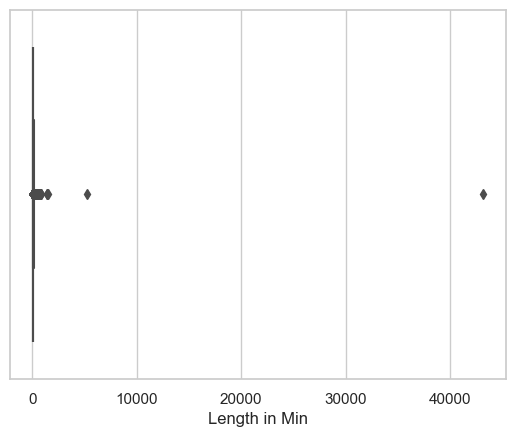

In [11]:
sns.set(style='whitegrid',palette='deep')
sns.boxplot(x=data['Length in Min'])

considering movies with runtime less than 4 hours

In [12]:
data = data[data['Length in Min']<240]

### Analysis

In [13]:
g=data.groupby('Release Year').agg({'IMDB Rating':'mean','Rating Count':'sum','Title':'count','Length in Min':'mean'})
g

,IMDB Rating,Rating Count,Title,Length in Min
Release Year,,,,
1911.0,5.985714,4714.0,7,63.857143
1912.0,6.042857,2559.0,7,68.571429
1913.0,6.361111,13805.0,18,87.166667
1914.0,6.130000,22957.0,30,78.600000
1915.0,6.177778,39715.0,27,69.037037
...,...,...,...,...
2019.0,5.687615,34564226.0,4352,101.227482
2020.0,5.526470,16977942.0,3249,98.196060
2021.0,5.587371,24330123.0,3500,101.290286


#### Number of movies released over the years

Text(0.5, 1.0, 'Number of movies released over the years')

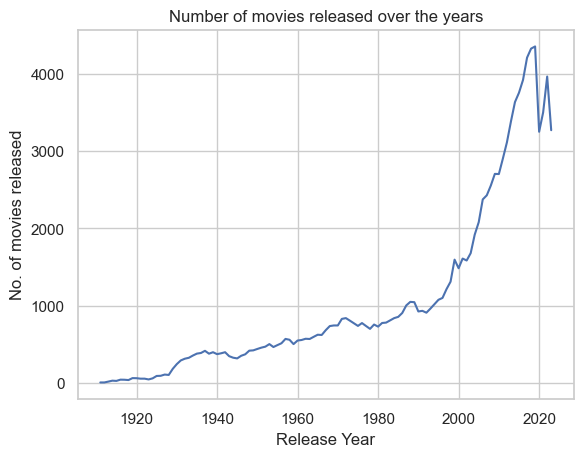

In [14]:
sns.lineplot(x=g.index,y='Title',data=g)
plt.ylabel('No. of movies released')
plt.title('Number of movies released over the years')

#### IMDB rating over the years

Text(0.5, 1.0, 'IMDB Rating over the years')

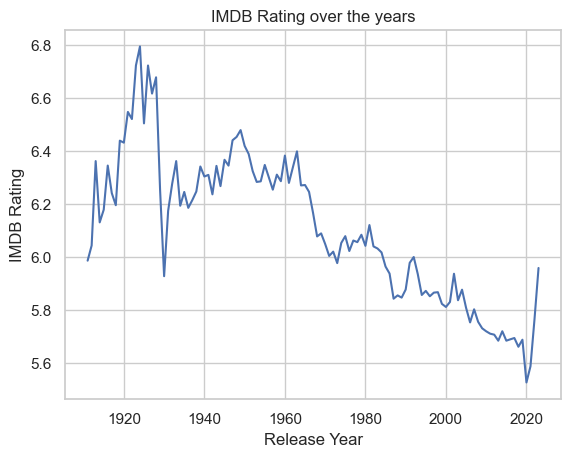

In [15]:
sns.lineplot(x=g.index,y='IMDB Rating',data=g)
plt.title('IMDB Rating over the years')

#### rating count over the years

Text(0, 0.5, 'rating count in M')

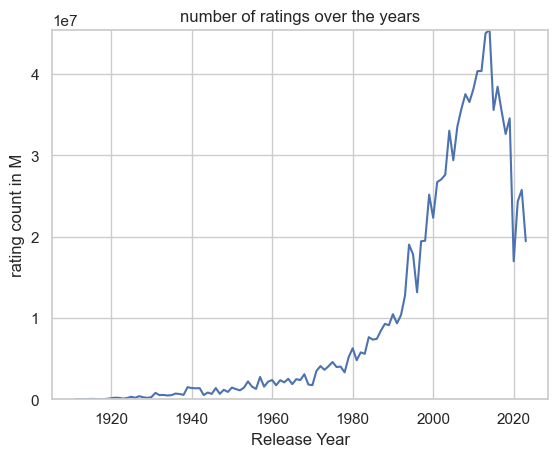

In [16]:
sns.lineplot(x=g.index,y='Rating Count',data=g)
plt.title('number of ratings over the years')
plt.ylim(0, g['Rating Count'].max() + 100) 
plt.ylabel('rating count in M')

#### length of movies over the years

<Axes: xlabel='Release Year', ylabel='Length in Min'>

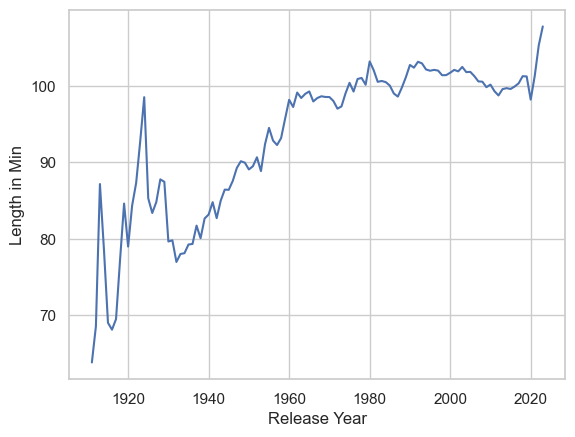

In [17]:
sns.lineplot(x=g.index,y='Length in Min',data=g)

#### correlation analysis

<Axes: >

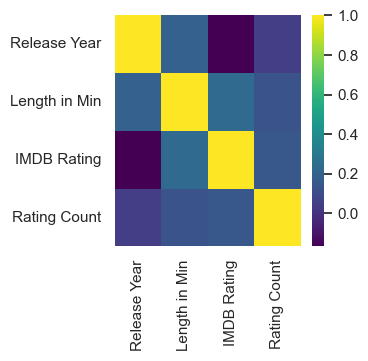

In [18]:
plt.figure(figsize=(3,3))
corr=data.iloc[:,1:5].corr()
sns.heatmap(corr,cmap='viridis')

there isnt much correlation among the variables

#### Genres with highest number of movies

In [19]:
genres=data.Genres.str.split("|",expand=True) 
genres.head(1)

,0,1,2
0,Drama,None,None


<Axes: xlabel='genre'>

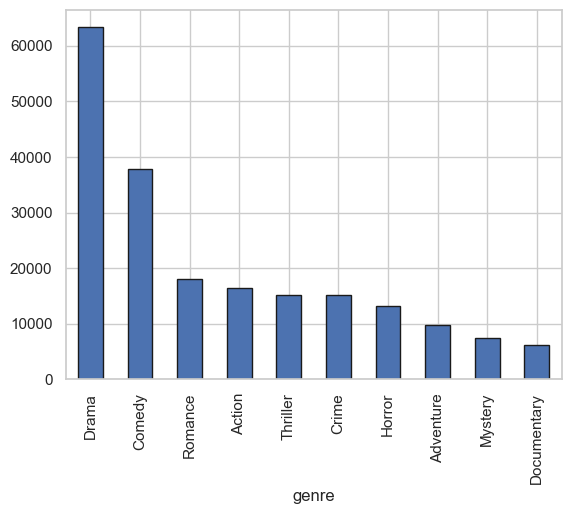

In [20]:
melted_df = genres.melt(value_vars=[0, 1, 2], value_name='genre')
melted_df = melted_df.dropna()
melted_df
genre_counts = melted_df['genre'].value_counts().head(10)
genre_counts.plot(kind='bar',edgecolor='k')

#### director with most movies

In [21]:
directors=data.Directors.str.split("|",expand=True) 
directors.head(3)

,0,1,2,3
0,Urban Gad,,None,None
1,Urban Gad,None,None,None
2,Charles L. Gaskill,,None,None


creating single list 

In [22]:
melted_df = directors.melt(value_vars=[0, 1, 2, 3], value_name='director')
melted_df = melted_df.dropna()
melted_df = melted_df[melted_df['director'] != '']

getting count of directors

In [23]:
director_counts = melted_df['director'].value_counts().head(10)

Text(0.5, 1.0, 'director with highest number of movies')

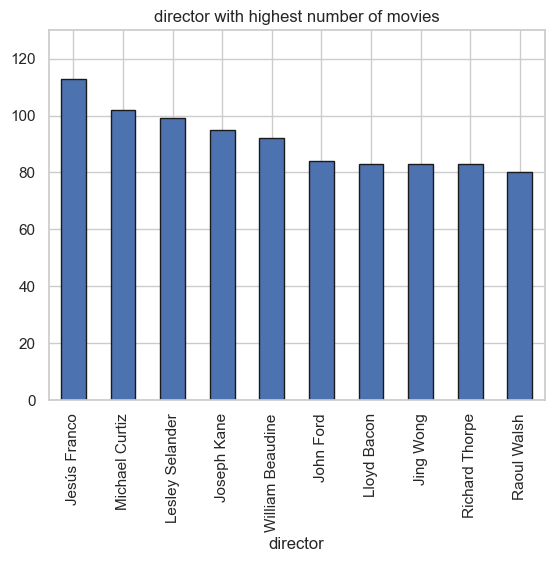

In [24]:
director_counts.plot(kind='bar',edgecolor='k')
plt.ylim(0, 130)
plt.title('director with highest number of movies')

#### directors with highest mean rating count

In [25]:
data['Directors'] = data['Directors'].str.split('|').apply(sorted)
data['Directors'] = data['Directors'].apply(', '.join)

Text(0.5, 1.0, 'top 10 directors with highest mean rating count')

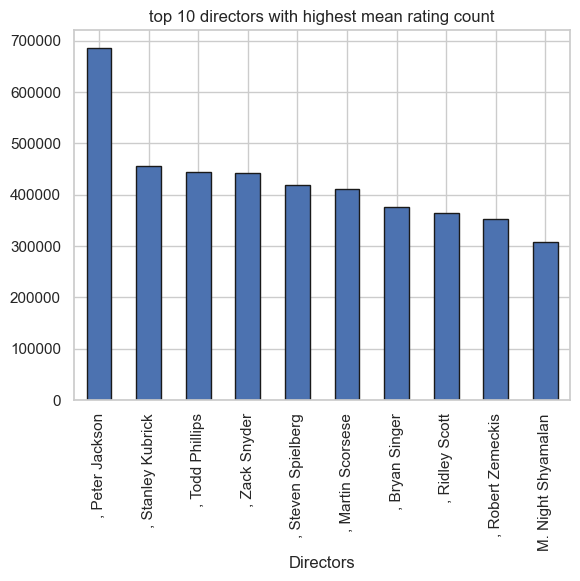

In [26]:
# Filter directors with at least 10 movies and calculate mean rating count
director_ratings = data.groupby('Directors').filter(lambda x: x['Title'].count() >= 10)
director_ratings = director_ratings.groupby('Directors')['Rating Count'].mean()

# Select top 10 directors with highest mean rating count
top_10_directors = director_ratings.sort_values(ascending=False).head(10)
top_10_directors.plot(kind='bar',edgecolor='k')
plt.title('top 10 directors with highest mean rating count')

#### top 10 highest rated movies

In [27]:
sorted_df = data.sort_values(by='IMDB Rating', ascending=False)
sorted_df=sorted_df.head(10)
sorted_df[['Title','Release Year','IMDB Rating']]

,Title,Release Year,IMDB Rating
2640,Ardhambardha Premakathe,2023.0,9.8
97131,Days of Géants,2019.0,9.7
2722,Mukalpparappu,2023.0,9.7
25502,Grinders,2023.0,9.6
2444,Nimmellara Aashirvada,2023.0,9.6
3706,Cuento de Primavera: A Spring Tale,2022.0,9.6
13935,Wheels of War,2015.0,9.6
31170,"Odazivam Ti se, Boze",1996.0,9.6
16152,Mithila Makhaan,2019.0,9.5
122569,The Return of Uncle Benon,2011.0,9.5


In [28]:
data


,Title,Release Year,Length in Min,IMDB Rating,Rating Count,Plot,Directors,Writers,Stars,Genres
0,Den sorte drøm,1911.0,53.0,5.8,265.0,Two men of high rank are both wooing the beaut...,", Urban Gad",Urban Gad|Gebhard Schätzler-Perasini|,Asta Nielsen|Valdemar Psilander|Gunnar Helseng...,Drama
1,Die Verräterin,1911.0,48.0,5.9,100.0,A woman betrays the regiment location in which...,Urban Gad,Erich Zeiske|,Asta Nielsen|Max Obal|Robert Valberg,Drama
2,Cleopatra,1912.0,100.0,5.1,620.0,The fabled queen of Egypt's affair with Roman ...,", Charles L. Gaskill",Victorien Sardou|Charles L. Gaskill|,Helen Gardner|Pearl Sindelar|Miss Fielding,Drama|History
3,L'Inferno,1911.0,71.0,7.0,3500.0,Loosely adapted from Dante's Divine Comedy and...,"Adolfo Padovan, Francesco Bertolini, Giuseppe ...",Dante Alighieri|,Salvatore Papa|Arturo Pirovano|Giuseppe de Lig...,Adventure|Drama|Fantasy
4,Den flyvende cirkus,1912.0,46.0,6.4,145.0,The Flying Circus was the largest traveling ar...,", Alfred Lind",Carl Otto Dumreicher|Alfred Lind|,Rasmus Ottesen|Emilie Otterdahl|Lili Beck,Drama
...,...,...,...,...,...,...,...,...,...,...
126684,El Ruby House,2023.0,101.0,6.7,1400.0,When a private family event gets leaked on soc...,", Peter Mimi",Reem El-Qamash|Mohamed el-Dabah|,Karim Abdel Aziz|Kareem Mahmoud Abdel Aziz|Nour,Comedy|Drama
126686,Den allvarsamma leken,2016.0,115.0,6.4,1400.0,"An adaptation of Hjalmar Söderberg's novel ""Th...",", Pernilla August",Hjalmar Söderberg|Lone Scherfig|Hjalmar Söderb...,Sverrir Gudnason|Karin Franz Körlof|Liv Mjönes,Drama|Romance
126687,Pan Samochodzik i templariusze,2023.0,110.0,4.3,1300.0,When an art historian finds an ancient Templar...,", Antoni Nykowski",Bartosz Sztybor|Antoni Nykowski|Zbigniew Niena...,Mateusz Janicki|Sandra Drzymalska|Maria Debska,Adventure|Drama|Family
126688,Goal of the Dead,2014.0,140.0,5.5,1600.0,A professional football team arrives at their ...,", Benjamin Rocher, Thierry Poiraud",Tristan Schulmann|Nicolas Peufaillit|Quoc Dang...,Alban Lenoir|Charlie Bruneau|Tiphaine Daviot,Comedy|Horror


In [108]:
df = data.copy()
all_stars = df['Stars'].str.split('|',expand=True)
x=all_stars.iloc[:,:3]
df_comb= pd.concat([df[['Release Year', 'Length in Min']], x], axis=1)
df_comb.head(2)

,Release Year,Length in Min,0,1,2
0,1911.0,53.0,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen
1,1911.0,48.0,Asta Nielsen,Max Obal,Robert Valberg


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df_comb[0] = label_encoder.fit_transform(df_comb[0])
df_comb[1] = label_encoder.fit_transform(df_comb[1])
df_comb[2] = label_encoder.fit_transform(df_comb[2])
df_comb

,Release Year,Length in Min,0,1,2
0,1911.0,53.0,4897,59382,23415
1,1911.0,48.0,4897,39734,55263
2,1912.0,100.0,18967,46461,46055
3,1911.0,71.0,43498,5222,22727
4,1912.0,46.0,40806,16634,38244
...,...,...,...,...,...
126684,2023.0,101.0,26018,30646,49034
126686,2016.0,115.0,47292,30772,38708
126687,2023.0,110.0,32926,52131,41374
126688,2014.0,140.0,1202,10007,64078


In [120]:
y = pd.Series(df['IMDB Rating'])
y.shape

(117771,)

In [124]:

X_train, X_test, y_train, y_test = train_test_split(df_comb, y, test_size=0.2, random_state=30)
model = LinearRegression()
model.fit(X_train, y_train)

test_r2 = r2_score(y_test, model.predict(X_test))


ValueError: Found input variables with inconsistent numbers of samples: [5, 117771]

(5,)